# Pump Performance

In [1]:
##Import modules
import math
import numpy as np
import scipy.interpolate
from scipy import signal
from scipy import integrate
import pandas as pd
import glob
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
#import mpld3
#mpld3.enable_notebook()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,5]
from datetime import datetime
fmt = "%Y-%m-%d %H:%M:%S" #2022-08-23 05:59:55

## Import data, rename varaibles, set to pacific time 

In [2]:
import pandas as pd
#df = pd.read_csv('Phase 2B-Busch Pumps Performance-20231107-120000-20231108-120000.csv')
df = pd.read_csv('CountingRoomScreen-He flows-20249110-221822-20249111-014303.csv')
df.head()

,Time,UCN2EpicsPhase2B/Measured:UCN2:HE3:FM101:RDFLOW Measured,Time.1,UCN2EpicsPhase2B/Measured:UCN2:HE4:FM201:RDFLOW Measured,Time.2,UCN2EpicsOthers/Measured:UCN2:HE4:FM202:RDFLOW Measured,Time.3,UCN2EpicsOthers/Measured:UCN2:HE4:FM203:RDFLOW Measured,Time.4,UCN2EpicsOthers/Measured:UCN2:HE4:FM204:RDFLOW Measured,...,Time.7,UCN2EpicsOthers/Measured:UCN2:HE4:FM207:RDFLOW Measured,Time.8,UCN2EpicsPhase2B/Measured:UCN2:HE4:FM208:RDFLOW Measured,Time.9,UCN2EpicsPhase2B/Measured:UCN2:HE3:NV101:POS Measured,Time.10,UCN2EpicsPhase2B/Measured:UCN2:HE4:NV201:POS Measured,Time.11,UCN2EpicsPhase2B/Measured:UCN2:HE3:PT109:RDPRESS Measured
0,1728623911,126.133,1728623911,53.3464,1728623911,9.79644,1728623911,26.3070,1728623911,1.98370,...,1728623911,163.192,1728623911,0,1728623911,20.0,1728623911,23.9994,1728623911,998.074
1,1728623921,126.469,1728623921,52.5529,1728623921,12.97040,1728623921,28.1075,1728623921,2.53304,...,1728623921,162.615,1728623921,0,1728623921,20.0,1728623921,23.9994,1728623921,999.579
2,1728623931,129.368,1728623931,53.4989,1728623931,10.58990,1728623931,26.4290,1728623931,1.28178,...,1728623931,160.158,1728623931,0,1728623931,20.0,1728623931,23.9994,1728623931,1001.130
3,1728623941,125.950,1728623941,53.0107,1728623941,11.38340,1728623941,28.1075,1728623941,2.44148,...,1728623941,161.803,1728623941,0,1728623941,20.0,1728623941,23.9994,1728623941,999.172
4,1728623951,126.133,1728623951,49.9283,1728623951,11.81070,1728623951,25.4219,1728623951,3.96741,...,1728623951,157.167,1728623951,0,1728623951,20.0,1728623951,23.9994,1728623951,998.725


In [3]:


df.rename(columns={"Time.7": "Time:FM207", 
                    "UCN2EpicsOthers/Measured:UCN2:HE4:FM207:RDFLOW Measured": "FM207",
                   "Time.6": "Time:FM206",
                    "UCN2EpicsOthers/Measured:UCN2:HE4:FM206:RDFLOW Measured": "FM206"
                    }, inplace=True)

df['Time:Stamp:FM207'] = pd.to_datetime(df['Time:FM207']-25200,unit='s')
df['Time:Stamp:FM206'] = pd.to_datetime(df['Time:FM206']-25200,unit='s')

dfFilling = df[(df['Time:Stamp:FM207'] >= '2024-10-10 22:44:21') & (df['Time:Stamp:FM207'] <= '2024-11-11 01:17:31')]

duration = np.max(dfFilling['Time:Stamp:FM207']) - np.min(dfFilling['Time:Stamp:FM207'])
print(f"Time elapsed: {duration}")
total_hours = duration.total_seconds() / 3600
print(f"Time elapsed: {total_hours} hours")

Time elapsed: 0 days 02:58:40
Time elapsed: 2.977777777777778 hours


<IPython.core.display.Javascript object>


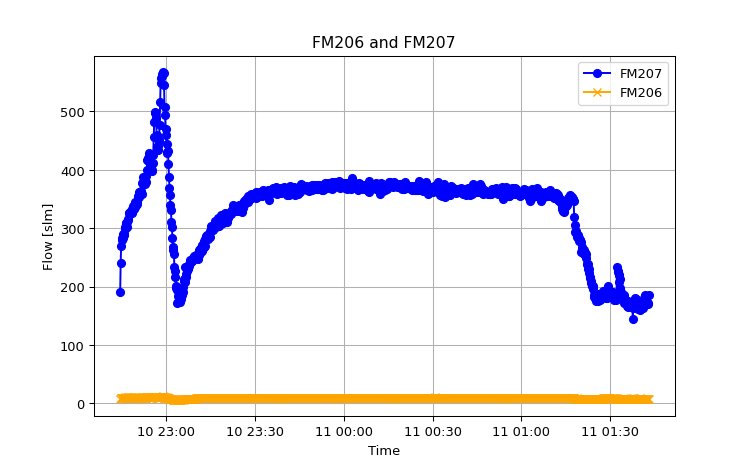

Time elapsed: 0 days 03:24:30
Time elapsed: 3.408333333333333 hours


In [4]:
plt.figure()
plt.plot(dfFilling['Time:Stamp:FM207'], dfFilling['FM207'], label="FM207", color='blue', marker='o')
plt.plot(dfFilling['Time:Stamp:FM206'], dfFilling['FM206'], label="FM206", color='orange', marker='x')

plt.xlabel('Time')
plt.ylabel('Flow [slm]')
plt.title('FM206 and FM207')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

duration = np.max(df['Time:Stamp:FM207']) - np.min(df['Time:Stamp:FM207'])
print(f"Time elapsed: {duration}")
total_hours = duration.total_seconds() / 3600
print(f"Time elapsed: {total_hours} hours" )

C:\Users\abrossard\AppData\Local\Temp\ipykernel_20876\859787321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilling['Time_0'] = dfFilling['Time:FM207'] - dfFilling['Time:FM207'].iloc[0]


<IPython.core.display.Javascript object>


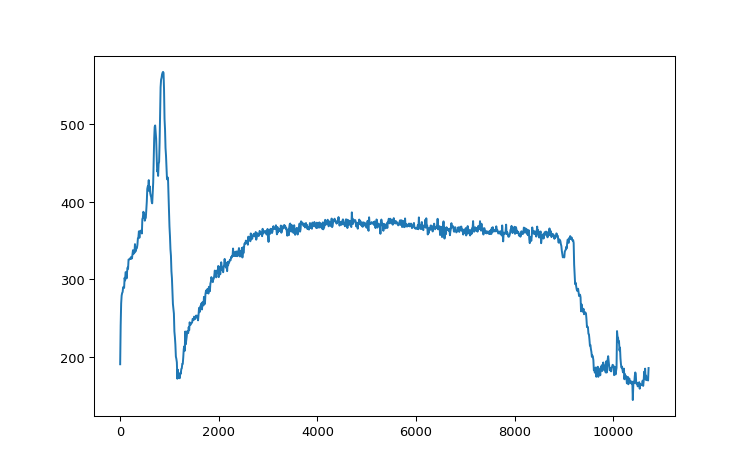

C:\Users\abrossard\AppData\Local\Temp\ipykernel_20876\859787321.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilling['Flow_Ls'] = dfFilling['FM207']/60


Average flow rate: 19918.120018656715 gas L/hour
Average flow rate: 26.48686172693712 liquid L/hour
Total consumption: 78.87198825354609 L of liquid Helium


In [5]:
dfFilling['Time_0'] = dfFilling['Time:FM207'] - dfFilling['Time:FM207'].iloc[0]
#ax = dfFilling.plot(x = 'Time_0', y = 'FM207', ylabel = 'Flow [SLM]')
plt.figure()
plt.plot(dfFilling['Time_0'],dfFilling['FM207'])
plt.show()
dfFilling['Flow_Ls'] = dfFilling['FM207']/60
total_time_seconds = np.max(dfFilling['Time_0']) - np.min(dfFilling['Time_0'])
#print(total_time_seconds)
total_time_hours = total_time_seconds / 3600  # Convert time to hours
#print(total_time_hours)
total_volume = np.trapz(dfFilling['Flow_Ls'], dfFilling['Time_0'])
#print(total_volume)
average_flow = total_volume / total_time_hours
print(f"Average flow rate: {average_flow} gas L/hour")
print(f"Average flow rate: {average_flow/752} liquid L/hour")
print(f"Total consumption: {average_flow*total_time_hours/752} L of liquid Helium")

C:\Users\abrossard\AppData\Local\Temp\ipykernel_20876\4015986225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilling['Time_0_FM206'] = dfFilling['Time:FM206'] - dfFilling['Time:FM206'].iloc[0]


<IPython.core.display.Javascript object>


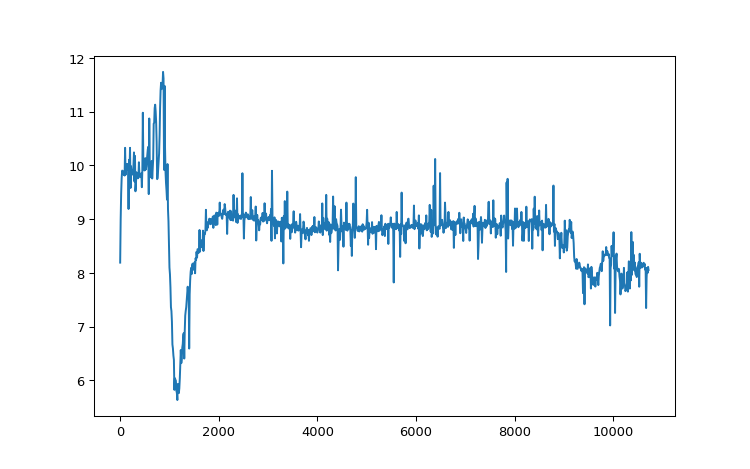

Average flow rate: 527.2536895522388 gas L/hour
Average flow rate: 0.7011352254684027 liquid L/hour
Total consumption: 2.0878248936170216 L of liquid Helium


C:\Users\abrossard\AppData\Local\Temp\ipykernel_20876\4015986225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilling['Flow_Ls'] = dfFilling['FM206']/60


In [6]:
dfFilling['Time_0_FM206'] = dfFilling['Time:FM206'] - dfFilling['Time:FM206'].iloc[0]
plt.figure()
plt.plot(dfFilling['Time_0'], dfFilling['FM206'])
plt.show()
dfFilling['Flow_Ls'] = dfFilling['FM206']/60
total_time_seconds = np.max(dfFilling['Time_0_FM206']) - np.min(dfFilling['Time_0_FM206'])
#print(total_time_seconds)
total_time_hours = total_time_seconds / 3600  # Convert time to hours
#print(total_time_hours)
total_volume = np.trapz(dfFilling['Flow_Ls'], dfFilling['Time_0_FM206'])
#print(total_volume)
average_flow = total_volume / total_time_hours
print(f"Average flow rate: {average_flow} gas L/hour")
print(f"Average flow rate: {average_flow/752} liquid L/hour")
print(f"Total consumption: {average_flow*total_time_hours/752} L of liquid Helium")

C:\Users\abrossard\AppData\Local\Temp\ipykernel_20876\431387679.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilling['T0'] = dfT['Time:TS351'] -  dfT['Time:TS351'].iloc[0]
C:\Users\abrossard\AppData\Local\Temp\ipykernel_20876\431387679.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilling['T0_h'] = dfFilling['T0']/3600


<IPython.core.display.Javascript object>


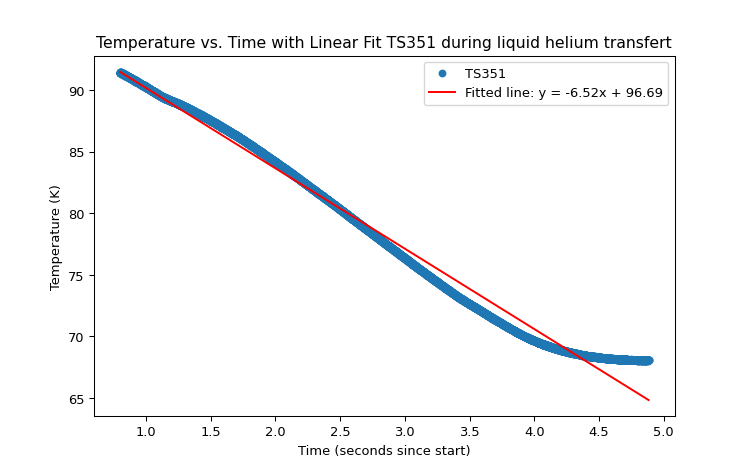

In [7]:
dfT = pd.read_csv('CountingRoomScreen-Shield temps-20249110-215620-20249111-024925.csv')
dfT.head()
dfT.rename(columns={ "Time.6": "Time:TS351",
                       "UCN2EpPha5Tmp/Measured:UCN2:LD2:TS351:RDTEMPK Measured": "TS351"
                    }, inplace=True)

dfT['Time:Stamp:TS351'] = pd.to_datetime(dfT['Time:TS351']-25200,unit='s')

dfFilling = dfT[(dfT['Time:Stamp:TS351'] >= '2024-10-10 22:44:21') & (dfT['Time:Stamp:TS351'] <= '2024-11-11 01:17:31')]
#ax = dfFilling.plot(x = 'Time:Stamp:TS351', y = 'TS351', ylabel = 'T [K]')
dfFilling['T0'] = dfT['Time:TS351'] -  dfT['Time:TS351'].iloc[0]
dfFilling['T0_h'] = dfFilling['T0']/3600
slope, intercept = np.polyfit(dfFilling['T0_h'], dfFilling['TS351'], 1)
y_fit = slope * dfFilling['T0_h'] + intercept
plt.figure()
plt.plot(dfFilling['T0_h'], dfFilling['TS351'], 'o', label='TS351', markersize=5)
plt.plot(dfFilling['T0_h'], y_fit, 'r-', label=f'Fitted line: y = {slope:.2f}x + {intercept:.2f}')
#plt.plot(dfFilling['T0'], y_fit, 'r-')
plt.xlabel('Time (seconds since start)')
plt.ylabel('Temperature (K)')
plt.title('Temperature vs. Time with Linear Fit TS351 during liquid helium transfert')
plt.legend()
plt.show()                                                  